In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams["figure.figsize"] = (15, 7)

In [2]:
def get_evolution_matrix(N_iter, rs, xs):
    mat = np.zeros((xs.shape[0], rs.shape[0], N_iter))
    mat[:, :, 0] = np.meshgrid(rs, xs)[1]
    for t in range(1, N_iter):
        mat[:, :, t] = rs * mat[:, :, t - 1] * (1 - mat[:, :, t - 1])
    return mat


def get_last_m(mat, m, n):
    return mat[:, :, n : n + m]

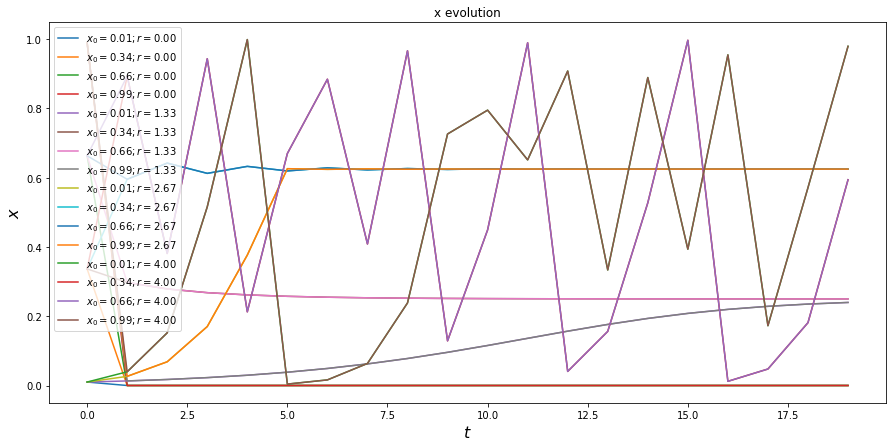

In [3]:
rs = np.linspace(0, 4, 4)
xs = np.linspace(0.01, 0.99, 4)
N_iter = 20
mat = get_evolution_matrix(N_iter, rs, xs)

### plot ####
for r_ind, r in enumerate(rs):
    for x_ind, x in enumerate(xs):
        plt.plot(mat[x_ind, r_ind, :], label=f"$x_0 ={x:.2f}; r = {r:.2f}$")
plt.title("x evolution")
plt.ylabel("$x$", fontsize=16)
plt.xlabel("$t$", fontsize=16)
plt.legend()
plt.show()

In [4]:
N_iter = 1000
resolution = 800
rs = np.linspace(0, 4, resolution)
xs = np.linspace(0.001, 1 - 0.001, resolution // 2)
mat = get_evolution_matrix(N_iter, rs, xs)
m = 10
last_mat = get_last_m(mat, m, N_iter - m)

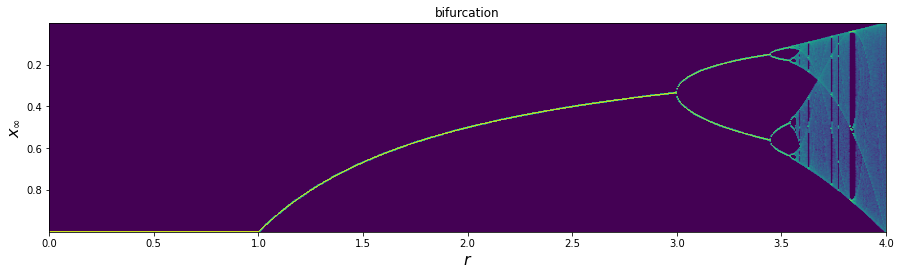

In [5]:
#### plot #####
img = np.zeros((last_mat.shape[0], last_mat.shape[1])) + 1
for t in range(m):
    for r_ind, r in enumerate(rs):
        for x in last_mat[:, r_ind, t]:
            img[int(x * xs.shape[0]), r_ind] += 1

plt.imshow(
    img,
    # cmap="gray",
    norm=matplotlib.colors.LogNorm(),
    extent=[rs.min(), rs.max(), xs.min(), xs.max()],
)
plt.gca().invert_yaxis()
plt.title("bifurcation")
plt.xlabel("$r$", fontsize=16)
plt.ylabel("$x_{\infty}$", fontsize=16)
plt.show()